## Uso de erramientas de `Machine Learning` con `Dask` 

In [13]:
import dask_ml.preprocessing as dpp
import dask.dataframe as dd

In [14]:
le = dpp.LabelEncoder()
df = dd.read_csv('data/air_traffic_data.csv')
#Hacemos cuatro particiones del dataframe
df = df.repartition(npartitions=4)
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


Voy a utilizar la columna `GEO Region` como parametro independiente

In [11]:
cols = ["Operating Airline","Published Airline"]
df = df.drop(cols,axis=1)
df.head()

,Activity Period,Operating Airline IATA Code,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,TZ,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,TZ,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,TZ,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,AC,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,AC,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


Aunque aquí arriba vemos que las columnas que queríamos eliminar siguen ahí, en la sigiente sentencia comprobaremos que estas dos columnas han sido eliminadas

In [15]:
col_obj = list(df.select_dtypes(include=['object']).columns)
col_obj

['Operating Airline',
 'Operating Airline IATA Code',
 'Published Airline',
 'Published Airline IATA Code',
 'GEO Summary',
 'GEO Region',
 'Activity Type Code',
 'Price Category Code',
 'Terminal',
 'Boarding Area',
 'Adjusted Activity Type Code',
 'Month']

In [16]:
df.drop_duplicates(subset=col_obj, inplace=True)
df.dropna()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
npartitions=4,,,,,,,,,,,,,,,,
,int64,object,object,object,object,object,object,object,object,object,object,int64,object,int64,int64,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [30]:
df[df.isnull() == True].sum().compute()

Activity Period                0.0
Operating Airline              0.0
Operating Airline IATA Code    0.0
Published Airline              0.0
Published Airline IATA Code    0.0
GEO Summary                    0.0
GEO Region                     0.0
Activity Type Code             0.0
Price Category Code            0.0
Terminal                       0.0
Boarding Area                  0.0
Passenger Count                0.0
Adjusted Activity Type Code    0.0
Adjusted Passenger Count       0.0
Year                           0.0
Month                          0.0
dtype: float64

In [17]:
df[df.isnull().sum().compute() > 0]

c:\Users\mglez\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\dataframe\core.py:4844: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = self._meta[_extract_meta(key)]


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
npartitions=4,,,,,,,,,,,,,,,,
,int64,object,object,object,object,object,object,object,object,object,object,int64,object,int64,int64,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [18]:
for i in col_obj:
    df[i] = df[i].astype(str)

In [19]:
for i in col_obj:
    print(i)

Operating Airline
Operating Airline IATA Code
Published Airline
Published Airline IATA Code
GEO Summary
GEO Region
Activity Type Code
Price Category Code
Terminal
Boarding Area
Adjusted Activity Type Code
Month


Usamos el `LabelEncoder` para pasar todas las columnas de strings a números

In [20]:
for i in col_obj:
    le.fit(df[i])
    df[i] = le.fit_transform(df[i])

In [21]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,0,60,0,54,0,8,0,0,2,1,27271,0,27271,2005,5
1,200507,0,60,0,54,0,8,1,0,2,1,29131,1,29131,2005,5
2,200507,0,60,0,54,0,8,2,0,2,1,5415,2,10830,2005,5
3,200507,4,6,4,6,1,2,0,1,2,1,35156,0,35156,2005,5
4,200507,4,6,4,6,1,2,1,1,2,1,34090,1,34090,2005,5


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
lista_columnas=list(df.columns)
for i in range(len(lista_columnas)):
    print(f"{i}. {lista_columnas[i]}")

0. Activity Period
1. Operating Airline
2. Operating Airline IATA Code
3. Published Airline
4. Published Airline IATA Code
5. GEO Summary
6. GEO Region
7. Activity Type Code
8. Price Category Code
9. Terminal
10. Boarding Area
11. Passenger Count
12. Adjusted Activity Type Code
13. Adjusted Passenger Count
14. Year
15. Month


<AxesSubplot:>

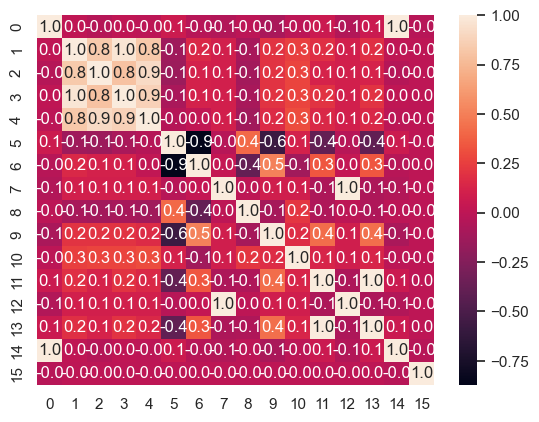

In [36]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")

Viendo el mapa de correlación y el listado de las columnas que tenemos arriba, deberíamos librarnos de aquellas columnas que no mantengan correlación con la columna independiente `Geo Region`.

Por ahora vamos a liberar las columnas `0,4,7,12,14,15`

In [41]:
columnas=["Activity Period","Published Airline IATA Code","Activity Type Code","Adjusted Activity Type Code","Year","Month"]
df=df.drop(columnas,axis=1)

Pintamos nuevamente el mapa de correlación

In [43]:
lista_columnas=list(df.columns)
for i in range(len(lista_columnas)):
    print(f"{i}. {lista_columnas[i]}")

0. Operating Airline
1. Operating Airline IATA Code
2. Published Airline
3. GEO Summary
4. GEO Region
5. Price Category Code
6. Terminal
7. Boarding Area
8. Passenger Count
9. Adjusted Passenger Count


<AxesSubplot:>

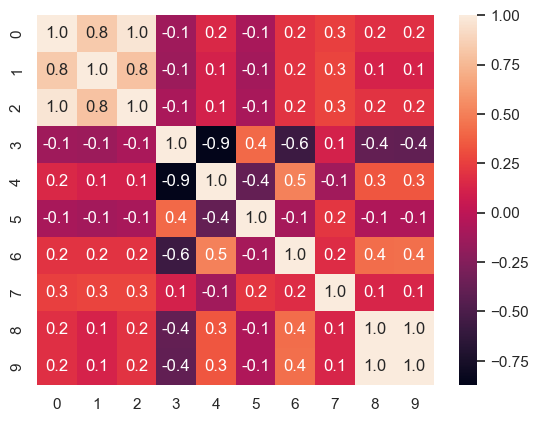

In [42]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")

Voy a probar con un modelo de `regresión lineal` con los datos así, sino igual quitlo las columnas `1,2,3,7`.

In [49]:
import dask_ml.linear_model as dml
import dask_ml.model_selection as dms

In [47]:
lr = dml.LinearRegression()
Y = df["GEO Region"]
X = df.drop("GEO Region",axis=1)

In [50]:
X_train, Y_train, X_test, Y_test = dms.train_test_split(X,Y,test_size=0.2)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

c:\Users\mglez\AppData\Local\Programs\Python\Python310\lib\site-packages\dask_ml\model_selection\_split.py:462: FutureWarning: The default value for 'shuffle' must be specified when splitting DataFrames. In the future DataFrames will automatically be shuffled within blocks prior to splitting. Specify 'shuffle=True' to adopt the future behavior now, or 'shuffle=False' to retain the previous behavior.
  warnings.warn(


((Delayed('int-8a22043b-15b3-4a2b-b7a9-731270d79df5'), 9),
 (Delayed('int-4a20d726-50b7-4405-b84a-5e0c9120bed0'), 9),
 (dd.Scalar<size-ag..., dtype=int32>,),
 (dd.Scalar<size-ag..., dtype=int32>,))

<AxesSubplot:xlabel='Adjusted Passenger Count', ylabel='Count'>

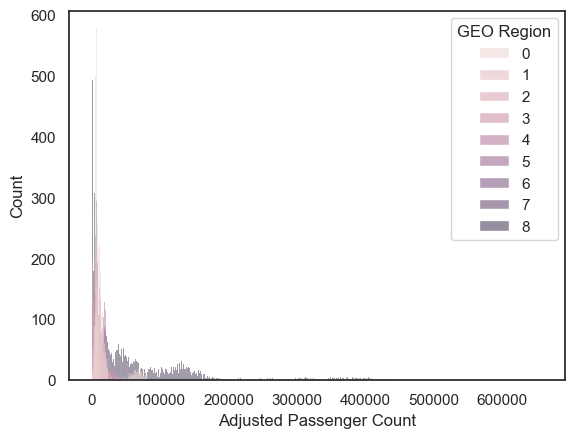

In [44]:
sns.histplot(data=df, x="Adjusted Passenger Count", hue="GEO Region")

In [88]:
df.groupby("GEO Region")["Adjusted Passenger Count"].mean().compute().sort_values(ascending=False)

GEO Region
US                     58485.878385
Asia                   13508.552704
Europe                 12779.055050
Canada                  9803.791255
Middle East             8658.612150
Mexico                  7250.898655
Australia / Oceania     6495.104478
Central America         4946.715328
South America           2786.011111
Name: Adjusted Passenger Count, dtype: float64

Por lo que podemos ver hay notablemente más pasageros cuya GEO Region es Estados Unidos